<h1><center>DS200 - Lec17: Logistic Regression with Python</center></h1>

## Introduction
In this lecture we will be working with the [Titanic Dataset from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset and very often is a student's first step in machine learning! 

We'll be trying to build a classification model - for `survival` or `deceased` labels in Titanic. Let's begin our understanding by implementing a Logistic Regression model in Python.

We'll use a "semi-cleaned" version of the titanic dataset, if you use the dataset hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Section 1: Load the Data
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's read in the `titanic_train.csv` file from the given URL into a pandas DataFrame.

In [2]:
url = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/titanic_train.csv'

In [7]:
titanic = pd.read_csv(url)


Show the top 5 data records.

In [8]:
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Section 2: Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

Check out the amount of missing data in each column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can also use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

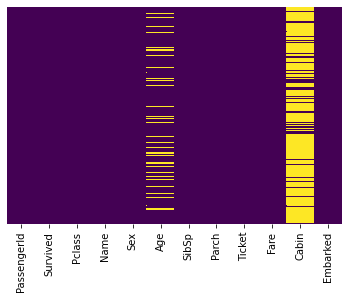

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Recreate the following plots. 

In [9]:
sns.set_style('whitegrid')




<AxesSubplot:xlabel='Survived', ylabel='count'>

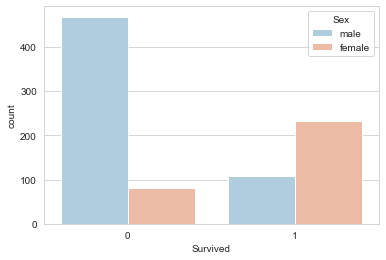

<AxesSubplot:xlabel='Survived', ylabel='count'>

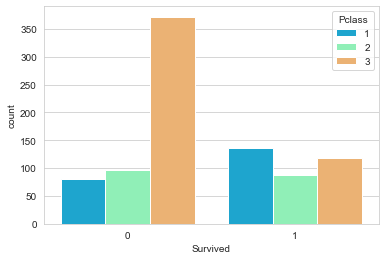

<AxesSubplot:xlabel='Age', ylabel='Count'>

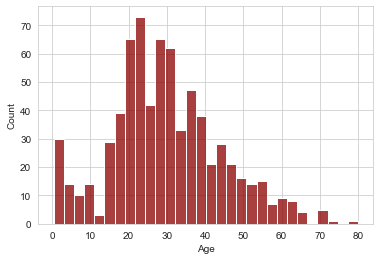

<AxesSubplot:xlabel='SibSp', ylabel='count'>

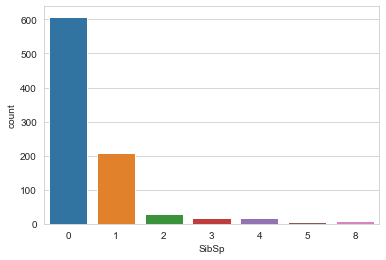

<AxesSubplot:ylabel='Frequency'>

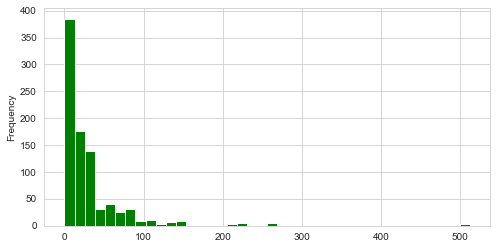

___
## Section 3: Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

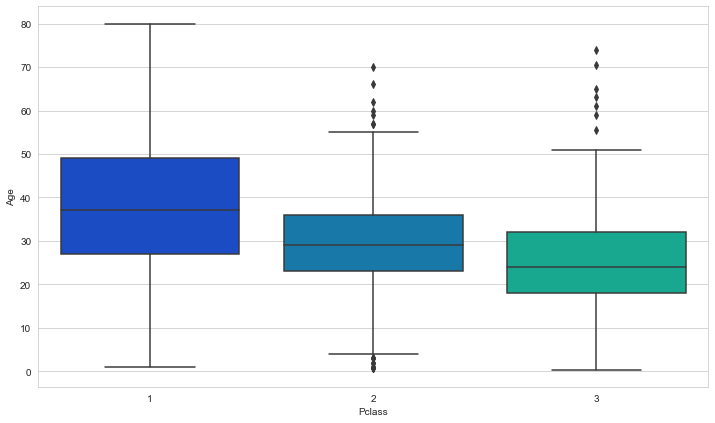

In [13]:
plt.figure(figsize=(12, 7))




We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [14]:
def impute_age(cols):
    Age =cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 
        elif Pclass== :
            return
    

Now apply that function!

In [15]:
titanic['Age'] = 



Now let's check that heat map again!

<AxesSubplot:>

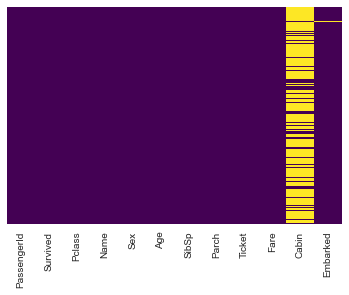

Great! Let's go ahead and drop the `Cabin` column.

In [13]:
titanic.drop('Cabin', axis = 1, inplace = True)





The `Embarked` column is also missing some data. Let's drop all the data records that has missing values.

Drop the `PassengerId` column as it is useless for classification.

In [11]:
titanic.drop('PassengerId', axis = 1, inplace = True)



## Section 4: Data Transformation

### 1) Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Create new dummy encoded columns for `Sex` and `Embarked`

In [15]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
sex = pd.get_dummies(data = titanic['Sex'], drop_first=True)


embark = pd.get_dummies(data = titanic['Embarked'], drop_first=True)


Drop the columns `Sex`, `Embarked`, `Name`, and `Ticket` from the `titanic` DataFrame.

In [20]:
titanic.drop(labels=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)



In [21]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Concatenate in the newly generated dummy columns

In [22]:
titanic = pd.concat([titanic, sex, embark], axis=1)

In [23]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### 2) Standardize the Numeric Columns

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

> ```z = (x - u) / s```

where u is the mean of the training samples, and s is the standard deviation of the training samples.


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()



Since standardization only needs to be done on the X features, we need to split the dataset now.

#### Get ready the X feature matrix and y label vector

In [26]:
X = titanic.drop('Survived', axis = 1)


y = titanic['Survived']



Standardize the X feature matrix.

In [29]:
scaler.fit(X)





StandardScaler()

In [33]:
X_scaled = scaler.transform(X)

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.30456871,  0.03928423,  0.38313716,  0.7269901 ,
         1.07084304,  1.41469598,  1.75854892,  2.10240186,  2.4462548 ,
         2.79010774,  3.13396068,  3.47781362,  3.82166656,  4.1655195 ,
         4.50937244,  4.85322538,  5.19707831,  5.54093125,  5.88478419,
         6.22863713,  6.57249007,  6.91634301,  7.26019595,  7.60404889,
         7.94790183,  8.29175477,  8.63560771,  8.97946065,  9.32331359,
         9.66716653]),
 <BarContainer object of 30 artists>)

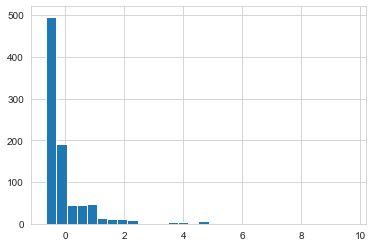

In [41]:
plt.hist(X_scaled[:,4], bins=30)

Great! Our data is ready for our model!

## Section 5: Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

#### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=101)




#### Model Training

In [44]:
from sklearn.linear_model import LogisticRegression



In [48]:
logmodel = LogisticRegression()


logmodel.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Predications

In [34]:
predictions = logmodel.predict



Let's move on to evaluate our model!

## Section 6: Evaluation

We can check precision, recall, f1-score using classification report!

In [49]:
from sklearn.metrics import classification_report, f1_score, accuracy_score



In [36]:
print('Classification Report: \n',   classification_report(y_test, predictions)   ) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [37]:
print('F1 Score: ',f1_score(y_test, predictions))

F1 Score:  0.7553191489361704


In [38]:
print('Accuracy Score: ',accuracy_score(y_test,predictions))

Accuracy Score:  0.8277153558052435


Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

# Great Job!